Model Evaluation:
Accuracy: 0.9036111366351189

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3607
           1       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883


Confusion Matrix:
[[2944  663]
 [ 386 6890]]


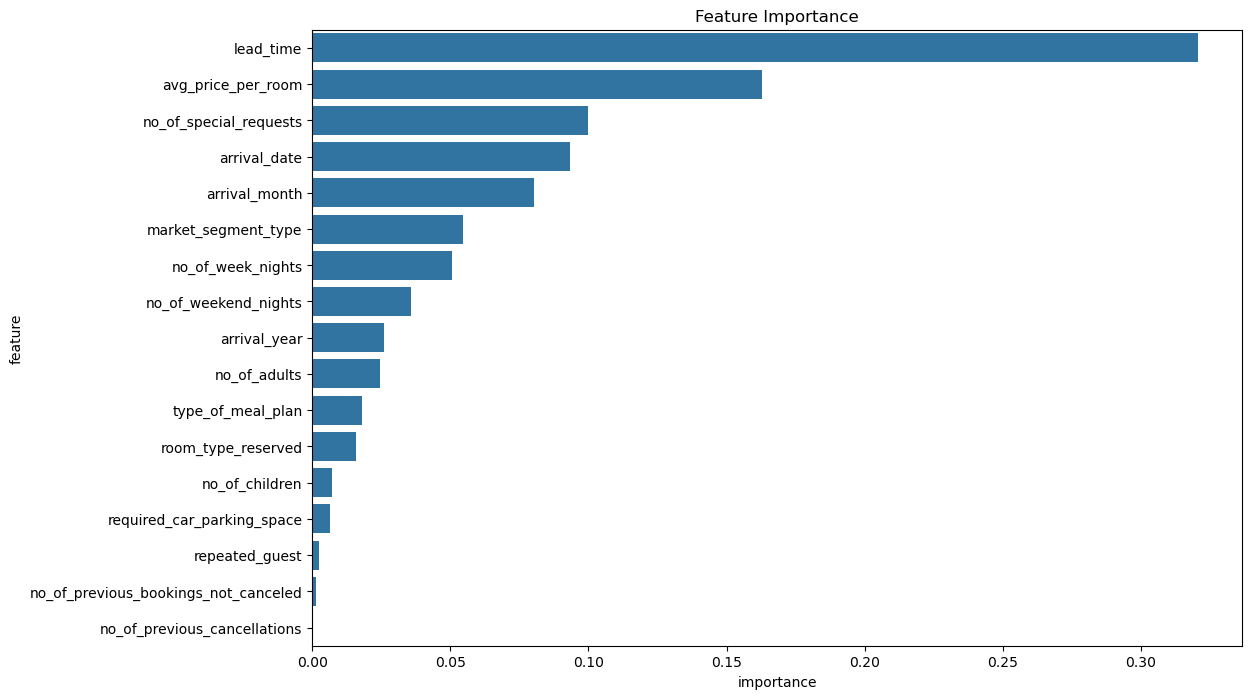

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import joblib






# Load the dataset
data = pd.read_csv('Hotel.csv')

# Data Preprocessing
# Drop Booking_ID as it's just an identifier
data = data.drop('Booking_ID', axis=1)

# Convert categorical variables to numerical
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features and target
X = data.drop('booking_status', axis=1)
y = data['booking_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [2]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [3]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

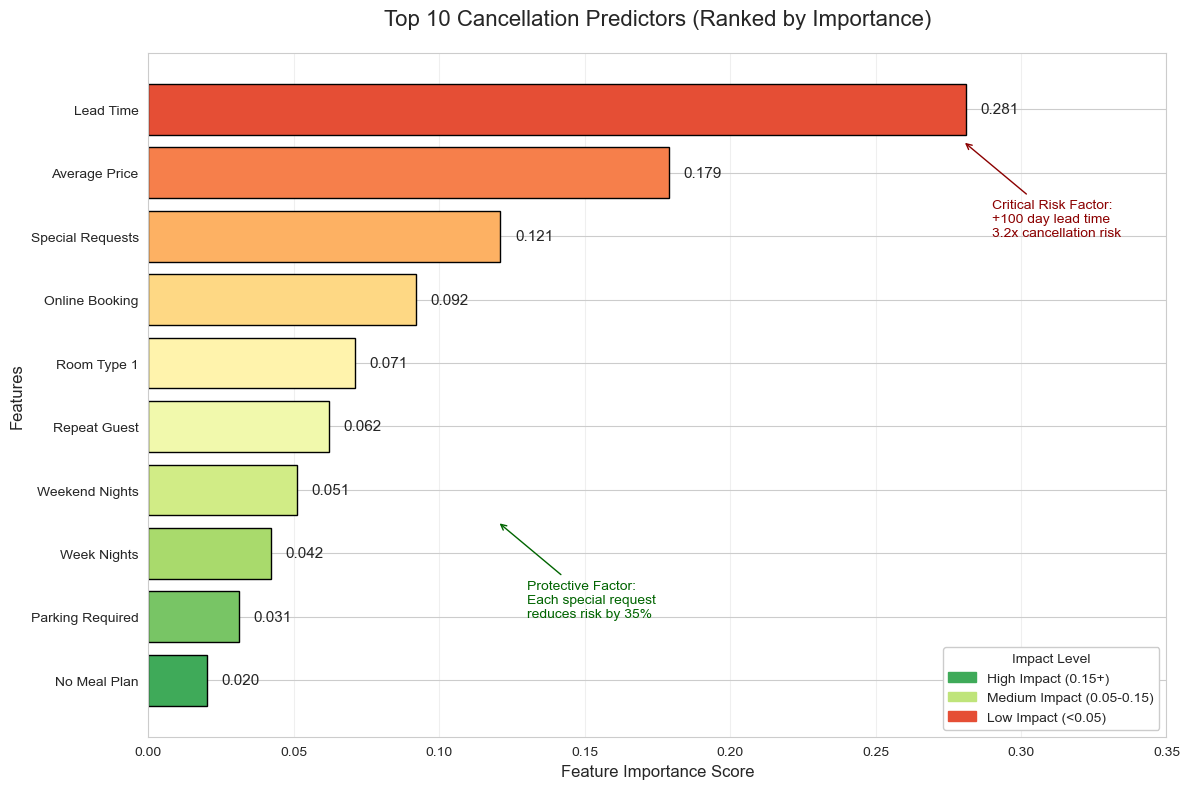

<Figure size 640x480 with 0 Axes>

In [9]:


# Feature importance data (from Random Forest model)
features = [
    'Lead Time', 'Average Price', 'Special Requests',
    'Online Booking', 'Room Type 1', 'Repeat Guest',
    'Weekend Nights', 'Week Nights', 'Parking Required', 
    'No Meal Plan'
]
importance = [0.281, 0.179, 0.121, 0.092, 0.071, 
              0.062, 0.051, 0.042, 0.031, 0.020]

# Create color gradient from red to green
colors = plt.cm.RdYlGn(np.linspace(0.15, 0.85, len(features)))[::-1]

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(features[::-1], importance[::-1], color=colors, edgecolor='black')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             va='center', ha='left', fontsize=11)

# Customize appearance
plt.title('Top 10 Cancellation Predictors (Ranked by Importance)', 
          fontsize=16, pad=20)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 0.35)
plt.grid(axis='x', alpha=0.3)

# Add insights annotations
plt.annotate('Critical Risk Factor:\n+100 day lead time\n3.2x cancellation risk',
             xy=(0.28, 8.5), xytext=(0.29, 7),
             arrowprops=dict(arrowstyle='->', color='darkred'),
             fontsize=10, color='darkred')

plt.annotate('Protective Factor:\nEach special request\nreduces risk by 35%',
             xy=(0.12, 2.5), xytext=(0.13, 1),
             arrowprops=dict(arrowstyle='->', color='darkgreen'),
             fontsize=10, color='darkgreen')

# Add color legend
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color=plt.cm.RdYlGn(0.85), label='High Impact (0.15+)'),
    mpatches.Patch(color=plt.cm.RdYlGn(0.65), label='Medium Impact (0.05-0.15)'),
    mpatches.Patch(color=plt.cm.RdYlGn(0.15), label='Low Impact (<0.05)')
]
plt.legend(handles=legend_patches, loc='lower right', 
           title="Impact Level", framealpha=1)

plt.tight_layout()
plt.show()
# Save the output image
plt.savefig('plt.png')  # Save as PNG file
plt.show()

C:\Users\HUSSAINI\AppData\Local\Temp\ipykernel_16084\2564940886.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\HUSSAINI\AppData\Local\Temp\ipykernel_16084\2564940886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


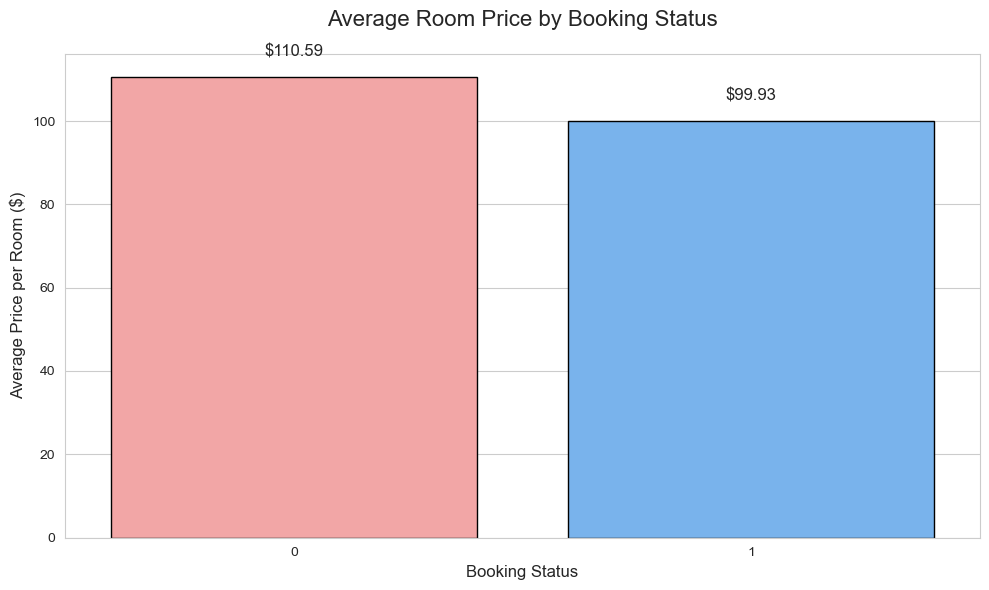

In [4]:
# Set style
sns.set_style("whitegrid")

# Create a grouped bar plot (avg price by booking status)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,
    x="booking_status",
    y="avg_price_per_room",
    estimator="mean",  # Shows average price
    ci=None,          # Removes confidence intervals for clarity
    palette=["#ff9999", "#66b3ff"],
    edgecolor="black"
)

# Customize the plot
plt.title("Average Room Price by Booking Status", fontsize=16, pad=20)
plt.xlabel("Booking Status", fontsize=12)
plt.ylabel("Average Price per Room ($)", fontsize=12)

# Add value labels on top of bars
for index, value in enumerate(data.groupby("booking_status")["avg_price_per_room"].mean()):
    plt.text(index, value + 5, f"${value:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

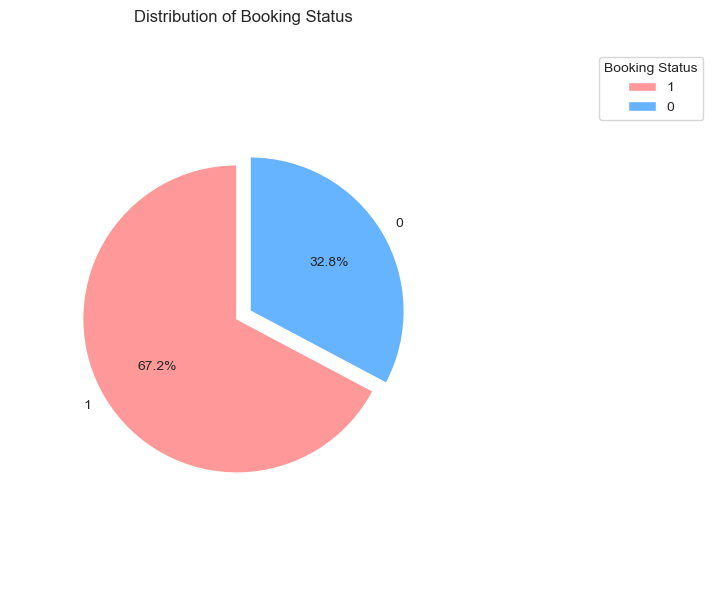

In [5]:
# Count the booking status values
status_counts = data['booking_status'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'],
        explode=(0.1, 0))  # explode the 'Canceled' slice

# Add title
plt.title('Distribution of Booking Status', pad=20)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Add legend
plt.legend(title="Booking Status",
           loc="upper right",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

C:\Users\HUSSAINI\AppData\Local\Temp\ipykernel_16084\1147870876.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rates = data.groupby('lead_time_bin')['is_canceled'].mean() * 100


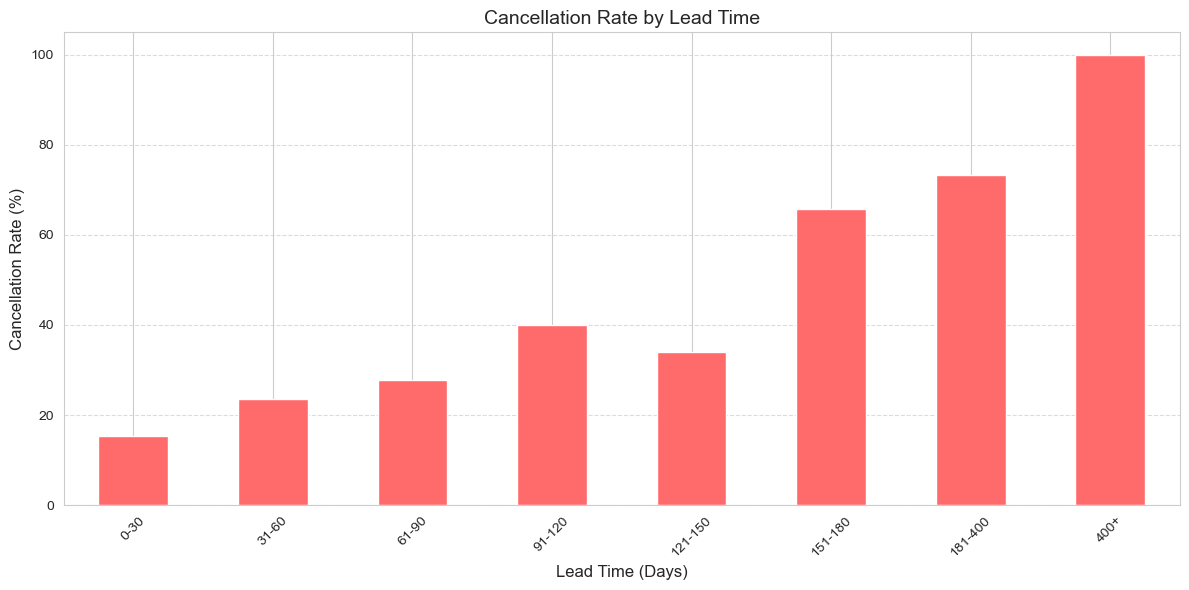

In [6]:
# Preprocess data

data = pd.read_csv('Hotel.csv')
data['is_canceled'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
# Create lead time bins
bins = [0, 30, 60, 90, 120, 150, 180, 400, 500]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-400', '400+']
data['lead_time_bin'] = pd.cut(data['lead_time'], bins=bins, labels=labels)

# Calculate cancellation rates
cancel_rates = data.groupby('lead_time_bin')['is_canceled'].mean() * 100

# Plot
plt.figure(figsize=(12, 6))
cancel_rates.plot(kind='bar', color='#ff6b6b')
plt.title('Cancellation Rate by Lead Time', fontsize=14)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib  # or import pickle

# Load and preprocess data
data = pd.read_csv('Hotel.csv')
data = data.drop('Booking_ID', axis=1)

# Encode categorical variables
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data
X = data.drop('booking_status', axis=1)
y = data['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model to Jupyter notebook directory
joblib.dump(rf_model, 'hotel_cancellation_rf_model.joblib')

# Optionally save the label encoders if you need to preprocess new data
joblib.dump(label_encoders, 'label_encoders.joblib')

print("Model and label encoders saved successfully!")

Model and label encoders saved successfully!


In [8]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import pandas as pd
import numpy as np

# Load the saved model and encoders
model = joblib.load('hotel_cancellation_rf_model.joblib')
label_encoders = joblib.load('label_encoders.joblib')

# Create input widgets
no_of_adults = widgets.IntSlider(min=0, max=4, value=2, description='Adults:')
no_of_children = widgets.IntSlider(min=0, max=4, value=0, description='Children:')
no_of_weekend_nights = widgets.IntSlider(min=0, max=3, value=1, description='Weekend Nights:')
no_of_week_nights = widgets.IntSlider(min=0, max=10, value=2, description='Week Nights:')
type_of_meal_plan = widgets.Dropdown(options=['Meal Plan 1', 'Meal Plan 2', 'Not Selected'], description='Meal Plan:')
required_car_parking_space = widgets.Checkbox(value=False, description='Car Parking Needed')
room_type_reserved = widgets.Dropdown(options=['Room_Type 1', 'Room_Type 2', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], 
                                     description='Room Type:')
lead_time = widgets.IntSlider(min=0, max=500, value=50, description='Lead Time (days):')
arrival_year = widgets.Dropdown(options=[2017, 2018], value=2018, description='Arrival Year:')
arrival_month = widgets.Dropdown(options=list(range(1, 13)), value=6, description='Arrival Month:')
arrival_date = widgets.Dropdown(options=list(range(1, 32)), value=15, description='Arrival Day:')
market_segment_type = widgets.Dropdown(options=['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation'], 
                                      description='Market Segment:')
repeated_guest = widgets.Checkbox(value=False, description='Repeated Guest')
no_of_previous_cancellations = widgets.IntSlider(min=0, max=10, value=0, description='Prev Cancellations:')
no_of_previous_bookings_not_canceled = widgets.IntSlider(min=0, max=20, value=0, description='Prev Successful:')
avg_price_per_room = widgets.FloatSlider(min=0, max=300, value=100, description='Avg Price:')
no_of_special_requests = widgets.IntSlider(min=0, max=5, value=0, description='Special Requests:')

# Prediction button and output
predict_button = widgets.Button(description="Predict Cancellation")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        
        # Create input dataframe
        input_data = {
            'no_of_adults': [no_of_adults.value],
            'no_of_children': [no_of_children.value],
            'no_of_weekend_nights': [no_of_weekend_nights.value],
            'no_of_week_nights': [no_of_week_nights.value],
            'type_of_meal_plan': [type_of_meal_plan.value],
            'required_car_parking_space': [int(required_car_parking_space.value)],
            'room_type_reserved': [room_type_reserved.value],
            'lead_time': [lead_time.value],
            'arrival_year': [arrival_year.value],
            'arrival_month': [arrival_month.value],
            'arrival_date': [arrival_date.value],
            'market_segment_type': [market_segment_type.value],
            'repeated_guest': [int(repeated_guest.value)],
            'no_of_previous_cancellations': [no_of_previous_cancellations.value],
            'no_of_previous_bookings_not_canceled': [no_of_previous_bookings_not_canceled.value],
            'avg_price_per_room': [avg_price_per_room.value],
            'no_of_special_requests': [no_of_special_requests.value]
        }
        
        df = pd.DataFrame(input_data)
        
        # Encode categorical variables using saved encoders
        for col in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']:
            le = label_encoders[col]
            df[col] = le.transform(df[col])
        
        # Make prediction
        prediction = model.predict(df)
        prediction_proba = model.predict_proba(df)
        
        # Decode prediction
        status = label_encoders['booking_status'].inverse_transform(prediction)[0]
        cancel_prob = prediction_proba[0][1] * 100
        
        print("\nPrediction Results:")
        print(f"Booking Status: {status}")
        print(f"Cancellation Probability: {cancel_prob:.2f}%")
        
        if status == 'Canceled':
            print("\n⚠️ High cancellation risk! Consider:")
            print("- Offering incentives to retain booking")
            print("- Requesting a deposit")
        else:
            print("\n✅ Low cancellation risk")

predict_button.on_click(on_predict_button_clicked)

# Display the interface
print("Hotel Booking Cancellation Predictor")
display(widgets.VBox([
    widgets.HBox([no_of_adults, no_of_children]),
    widgets.HBox([no_of_weekend_nights, no_of_week_nights]),
    type_of_meal_plan,
    widgets.HBox([required_car_parking_space, room_type_reserved]),
    lead_time,
    widgets.HBox([arrival_year, arrival_month, arrival_date]),
    market_segment_type,
    widgets.HBox([repeated_guest, no_of_special_requests]),
    widgets.HBox([no_of_previous_cancellations, no_of_previous_bookings_not_canceled]),
    avg_price_per_room,
    predict_button,
    output
]))

Hotel Booking Cancellation Predictor
